## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Merging all dataset file to single file

In [57]:
df= pd.read_csv('./Sales_data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Read all file from direcoty

In [58]:
import os

In [59]:
files=[file for file in os.listdir('./Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
    data= pd.read_csv('./Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data, data])

#save the concat data to single file
all_months_data.to_csv('alldata.csv',index=False)

## Read the alldata.csv

In [60]:
alldata=pd.read_csv('alldata.csv')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Up The Data!!!

##### Knowing The row that has NaN Values

In [61]:
nan=alldata[alldata.isna().any(axis=1)]
nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### Drop the NaN

In [62]:
alldata=alldata.dropna(how='any')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#####  There are Or Values in Month Column, so we need to know and drop them

In [63]:
temp=alldata[alldata['Order Date'].str[0:2]!='Or']
temp.head()
alldata=temp

##### Concert Columns to the correct type

In [64]:
alldata['Quantity Ordere']=pd.to_numeric(alldata['Quantity Ordered'])#Make int
alldata['Price Each']=pd.to_numeric(alldata['Price Each'])# Make Float
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1


## Augment data with additional columns

### Add Month Column

In [65]:
alldata['Month']=alldata['Order Date'].str[0:2]
alldata['Month']=alldata['Month'].astype('int32')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1,4


### Add Sales Column

In [66]:
alldata['Sales'] = alldata['Quantity Ordered'].astype('int') * alldata['Price Each'].astype('float')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1,4,11.99


##### Add City Columns

In [71]:
#use .apply() method

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

alldata['City']= alldata['Purchase Address'].apply(
    lambda x: f"{get_city(x)} ({get_state(x)})")
alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA)


#### What was the best month for sales? How much was earned that month?

In [43]:
results=alldata.groupby('Month').sum()
results

,Price Each,Quantity Ordere,Sales
Month,,,
1,1.811768e+06,10903,1.822257e+06
2,2.188885e+06,13449,2.202022e+06
3,2.791208e+06,17005,2.807100e+06
4,3.367671e+06,20558,3.390670e+06
5,3.135125e+06,18667,3.152607e+06
6,2.562026e+06,15253,2.577802e+06
7,2.632540e+06,16072,2.647776e+06
8,2.230345e+06,13448,2.244468e+06
9,2.084992e+06,13109,2.097560e+06


<BarContainer object of 12 artists>

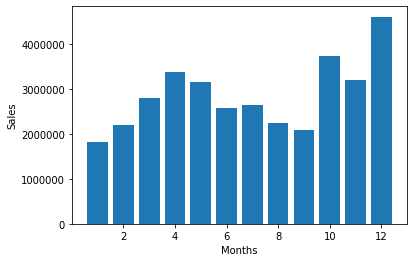

In [46]:
months=range(1,13)
plt.ylabel('Sales')
plt.xlabel('Months')
plt.bar(months,results['Sales'])

## What City had the highest number of sales

In [72]:
#After add city column

results=alldata.groupby('City').sum()
results

,Price Each,Quantity Ordere,Month,Sales
City,,,,
Atlanta (GA),2.779908e+06,16602,104794,2.795499e+06
Austin (TX),1.809874e+06,11153,69829,1.819582e+06
Boston (MA),3.637410e+06,22528,141112,3.661642e+06
Dallas (TX),2.752628e+06,16730,104620,2.767975e+06
Los Angeles (CA),5.421435e+06,33289,208325,5.452571e+06
New York City (NY),4.635371e+06,27932,175741,4.664317e+06
Portland (ME),4.471893e+05,2750,17144,4.497583e+05
Portland (OR),1.860558e+06,11303,70621,1.870732e+06
San Francisco (CA),8.211462e+06,50239,315520,8.262204e+06


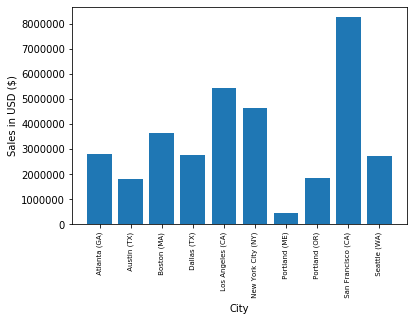

In [87]:
city=[city for city, df in alldata.groupby('City')]
plt.bar(city, results['Sales'])
plt.xticks(city,  rotation='vertical', size=7)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.show()

### What Time should we display advertisements to maximize likehood of customers buying product?

In [89]:
#Convert Order Date to datetime format
alldata['Order Date']=pd.to_datetime(alldata['Order Date'])
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",1,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA)


In [90]:
alldata['Hour']=alldata['Order Date'].dt.hour
alldata['Minutes']=alldata['Order Date'].dt.minute
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",1,4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA),9,27


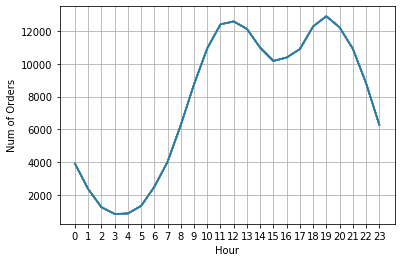

In [96]:
hours=[hour for hour, df in alldata.groupby('Hour')]

plt.plot(hours, alldata.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Num of Orders')
plt.grid()
plt.show()

## What Products are most often sold together?

In [97]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",1,4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA),9,27


In [101]:
sold=alldata[alldata['Order ID'].duplicated(keep=False)]

sold['Group']=sold.groupby('Order ID')['Product'].transform(
    lambda x: ','.join(x))

sold.head()

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere,Month,Sales,City,Hour,Minutes,Group
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",1,4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",1,4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",1,4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [105]:
sold=sold[['Order ID','Group']].drop_duplicates()
sold.head(5)

,Order ID,Group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [110]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in sold['Group']:
    rowlist=row.split(',')
    count.update(Counter(combinations(rowlist, 2)))
    
for key, value in count.most_common(10):
    print(key,value)



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### WHat Product sold the most? Why did you thin it sold the most?

In [111]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity Ordere,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",1,4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",1,4,11.99,Los Angeles (CA),9,27


In [113]:
productgr=alldata.groupby('Product')
productgr.sum()

,Price Each,Quantity Ordere,Month,Sales,Hour,Minutes
Product,,,,,,
20in Monitor,451068.99,4129,29336,454148.71,58764,122252
27in 4K Gaming Monitor,2429637.70,6244,44440,2435097.56,90916,184331
27in FHD Monitor,1125974.93,7550,52558,1132424.50,107540,219948
34in Ultrawide Monitor,2348718.19,6199,43304,2355558.01,89076,183480
AA Batteries (4-pack),79015.68,27635,145558,106118.40,298342,609039
AAA Batteries (4-pack),61716.59,31017,146370,92740.83,297332,612113
Apple Airpods Headphones,2332350.00,15661,109477,2349150.00,223304,455570
Bose SoundSport Headphones,1332366.75,13457,94113,1345565.43,192445,392603
Flatscreen TV,1440000.00,4819,34224,1445700.00,68815,142789


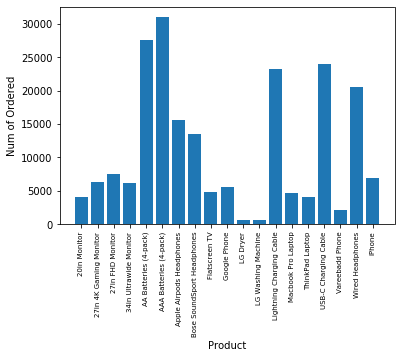

In [117]:
quantity= productgr.sum()['Quantity Ordere']

products= [product for product, df in productgr]
plt.bar(products, quantity)
plt.xticks(products, rotation='vertical', size=7)
plt.xlabel('Product')
plt.ylabel('Num of Ordered')
plt.show()

In [119]:
prices = alldata.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


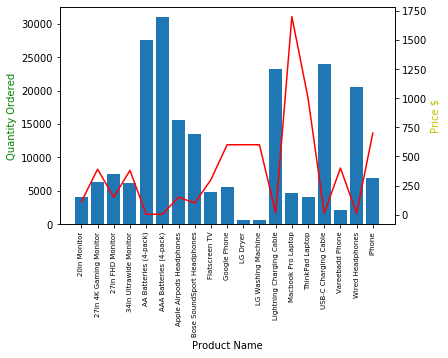

In [125]:
fig, ax1= plt.subplots()

ax2=ax1.twinx()

ax1.bar(products, quantity)
ax2.plot(products, prices, 'r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price $', color='y')
ax1.set_xticklabels(products, rotation='vertical',size=7)

plt.show()